In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Utkarsh Internship/abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
result = df.groupby('Sex')['Whole weight'].agg(['mean', 'median', 'std'])
print(result)

         mean   median       std
Sex                             
F    1.046532  1.03850  0.430316
I    0.431363  0.38400  0.286275
M    0.991459  0.97575  0.470581


In [7]:
df_filtered = df[(df['Rings'] >= 10) & (df['Rings'] <= 15)]
print(df_filtered)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
3      M   0.440     0.365   0.125        0.5160          0.2155   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
...   ..     ...       ...     ...           ...             ...   
4170   M   0.550     0.430   0.130        0.8395          0.3155   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
3             0.1140        0.1550     10  
10            0.1475        0.2100     14  
11     

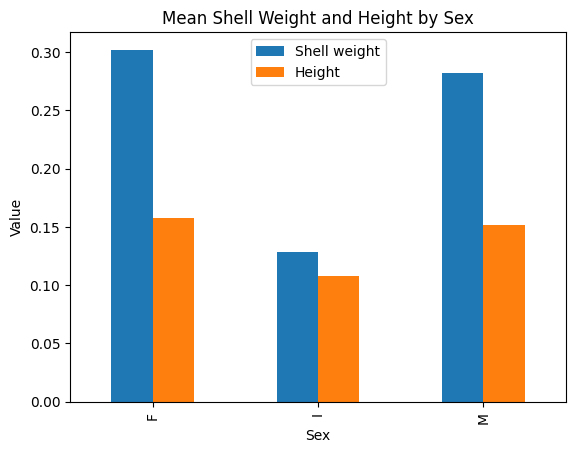

In [9]:
grouped = df.groupby('Sex')[['Shell weight', 'Height']].mean()

grouped.plot(kind='bar')
plt.title('Mean Shell Weight and Height by Sex')
plt.xlabel('Sex')
plt.ylabel('Value')
plt.show()

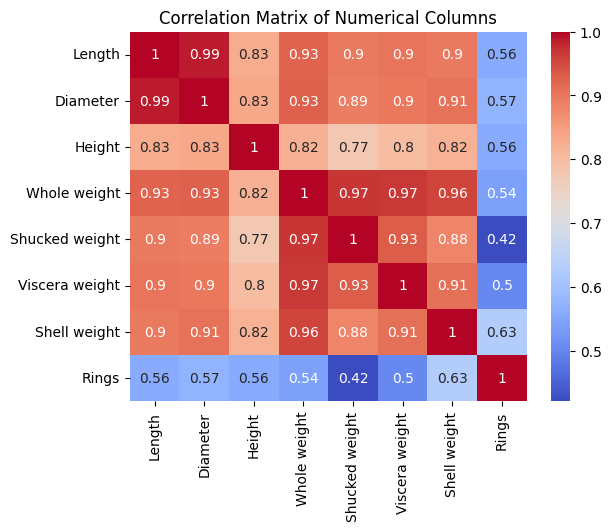

In [10]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [13]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Normalization
for col in numerical_cols:
    df[col] = df[col] / df[col].max()

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.558282,0.561538,0.084071,0.181915,0.150874,0.132895,0.149254,0.517241
1,M,0.429448,0.407692,0.079646,0.079809,0.066868,0.063816,0.069652,0.241379
2,F,0.650307,0.646154,0.119469,0.239604,0.172379,0.186184,0.208955,0.310345
3,M,0.539877,0.561538,0.110619,0.182623,0.144825,0.150000,0.154229,0.344828
4,I,0.404908,0.392308,0.070796,0.072554,0.060148,0.051974,0.054726,0.241379


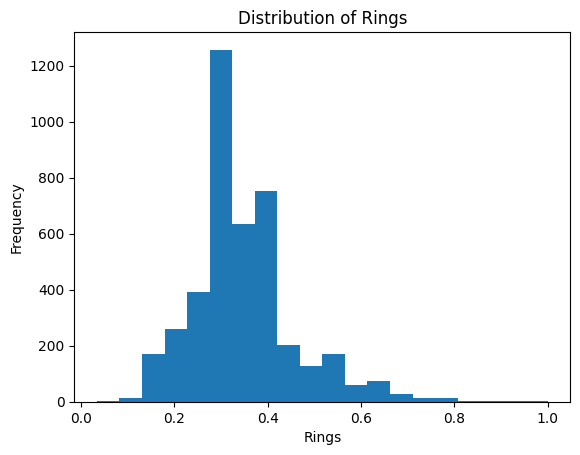

In [14]:
plt.hist(df['Rings'], bins=20)
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')
plt.show()

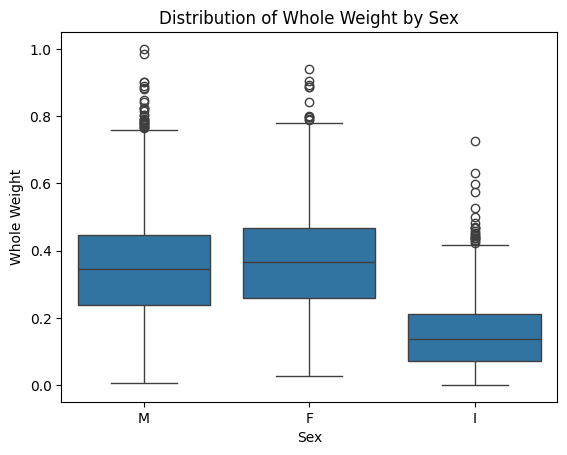

In [16]:
sns.boxplot(x='Sex', y='Whole weight', data=df)
plt.xlabel('Sex')
plt.ylabel('Whole Weight')
plt.title('Distribution of Whole Weight by Sex')
plt.show()

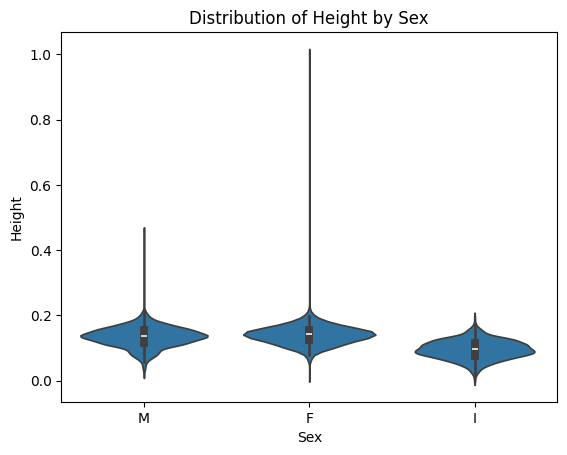

In [17]:
sns.violinplot(x='Sex', y='Height', data=df)
plt.xlabel('Sex')
plt.ylabel('Height')
plt.title('Distribution of Height by Sex')
plt.show()

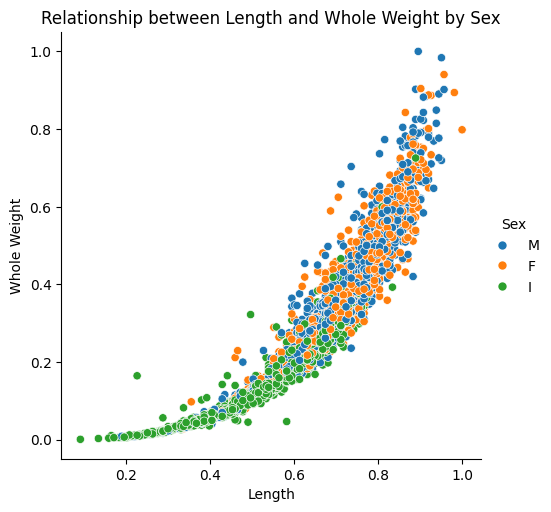

In [19]:
sns.relplot(x='Length', y='Whole weight', hue='Sex', data=df)
plt.xlabel('Length')
plt.ylabel('Whole Weight')
plt.title('Relationship between Length and Whole Weight by Sex')
plt.show()